# Denoising data using Fast Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from mightypy.make import sine_wave_from_sample, sine_wave_from_timesteps

style.use("seaborn")

%matplotlib inline

## Genereting a noisy signal

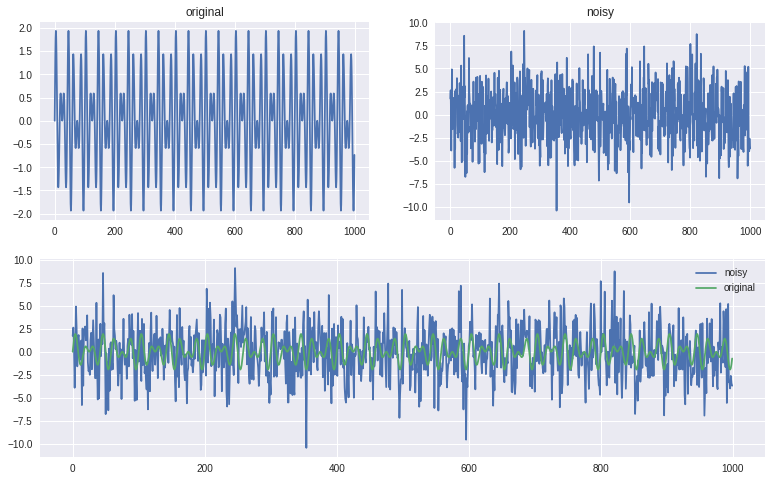

In [13]:
time_step = 0.001

wave1, time1, freqs1  = sine_wave_from_timesteps(signal_freq=50,time_step=time_step)
wave2, time2, freqs2  = sine_wave_from_timesteps(signal_freq=70,time_step=time_step)
original_signal = wave1 + wave2

N = len(original_signal)

noisy_signal = original_signal + 2.5 * np.random.randn(N) # adding random noise here


fig = plt.figure(figsize=(13,8))
                 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,(3,4))
                

ax1.plot(original_signal)
ax1.set_title("original")

ax2.plot(noisy_signal)
ax2.set_title("noisy")

ax3.plot(noisy_signal,label="noisy")
ax3.plot(original_signal, label="original")

plt.legend()



## Calculating FFT

In [3]:
f_hat = np.fft.fft(noisy_signal,N)

In [4]:
n = int(np.floor(N/2)) # frequencies till N/2 can be used for this processing

## Power Spectral Density

- power spectral density is measure of signal power.
- how the strength of a signal is distributed in the frequency domain.

$\lambda = a + ib\\
\overline{\lambda} = a - ib$

$\lambda . \overline{\lambda} = \lambda^2 = a^2 + b^2$



In [5]:
new_freqs = (1/(N*time_step)) * np.arange(N)

In [6]:
psd = (f_hat * np.conjugate(f_hat) / N).real # imag is already 0
mag = (np.abs(f_hat) / N).real # imag is already 0

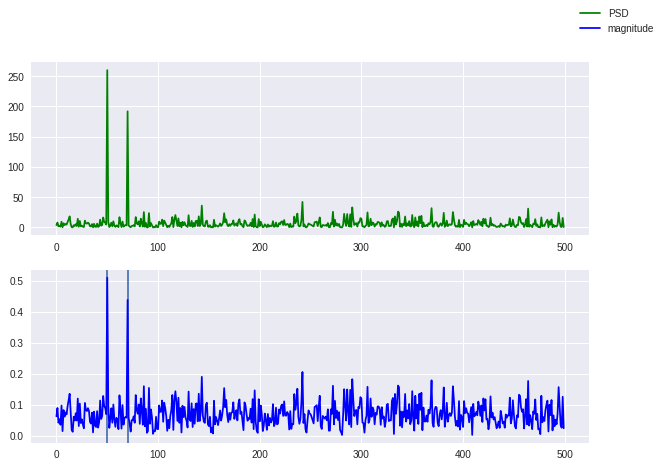

In [7]:
fig,ax = plt.subplots(2,1,figsize=(10,7))
plt.axvline(50)
plt.axvline(70)
ax[0].plot(new_freqs[:n],psd[:n],'g',label='PSD')
ax[1].plot(new_freqs[:n],mag[:n],'b',label="magnitude")
fig.legend()

## Pickup index based on PSD threshold

it will give True value for idxs to keep and False value for idxs to make 0

In [8]:
threshold_idxs = (psd > 100)

## Cleanup using PSD

multiply it with the psd signal to cleanup noisy enery signals

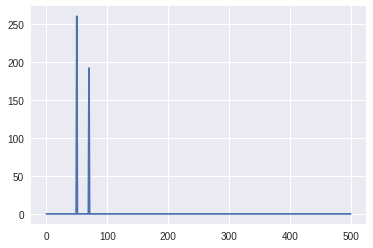

In [9]:
cleaned_psd = psd * threshold_idxs
plt.plot(new_freqs[:n],cleaned_psd[:n])

## Cleanup frequency transforms 
similarly multiply it with the f_hat to cleanup frequecies

In [10]:
cleaned_f_hat = f_hat * threshold_idxs

## Regenerate signal using Inverse Fourier Transform

In [11]:
regen_signal = np.fft.ifft(cleaned_f_hat).real

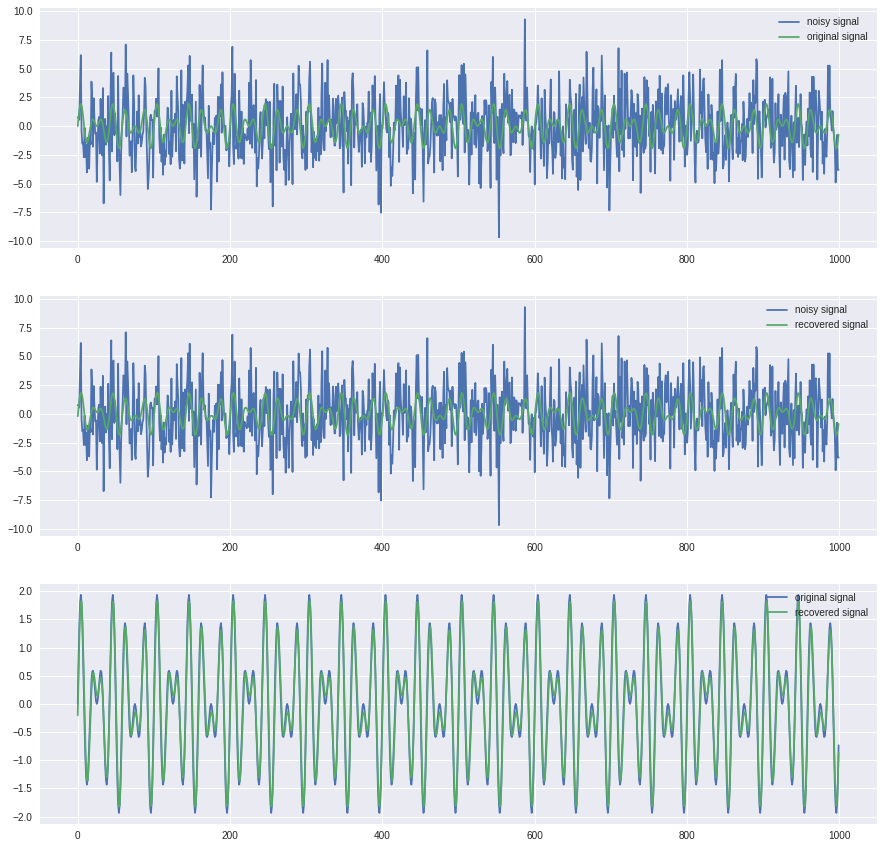

In [12]:
fig,ax = plt.subplots(3,1,figsize=(15,15))

ax[0].plot(noisy_signal,label="noisy signal")
ax[0].plot(original_signal,label="original signal")
ax[0].legend()

ax[1].plot(noisy_signal,label="noisy signal")
ax[1].plot(regen_signal,label="recovered signal")
ax[1].legend()

ax[2].plot(original_signal,label="original signal")
ax[2].plot(regen_signal,label="recovered signal")
ax[2].legend()

plt.show()